In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from numpy import genfromtxt
import scipy.optimize as optimization
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
Threshhold_current = 31.2 #mA
#Resonant flourecence occures between 4.64 and 4.78 Volts
#as offset is increased, resonant flourecence stops occuring, then occures again as offset continues to increase
#as amplitude is descreased, intensity due to resoant flourecence decreases

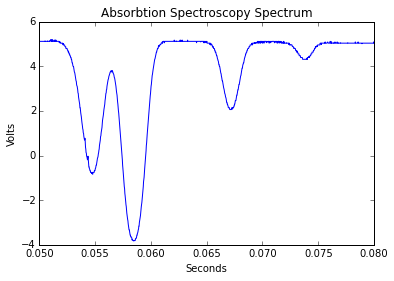

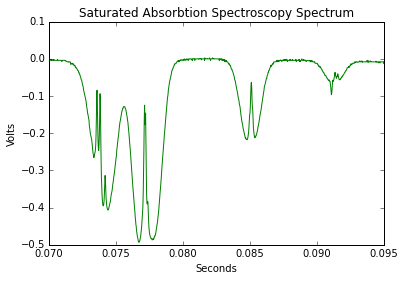

In [3]:
####################
f = genfromtxt('2.csv', delimiter=',')

time_1 = f.T[0]
volts_1 = f.T[1]

plt.plot(time_1, volts_1, 'b')
plt.xlabel('Seconds')
plt.ylabel('Volts')
plt.title('Absorbtion Spectroscopy Spectrum')
plt.xlim(.05, 0.08)

plt.show()


################
g = genfromtxt('4.csv', delimiter=',')

time_2 = g.T[0]
volts_2 = g.T[1]

plt.plot(time_2, volts_2, 'g')
plt.xlabel('Seconds')
plt.ylabel('Volts')
plt.title('Saturated Absorbtion Spectroscopy Spectrum')
plt.xlim(.07, .095)

plt.show()

In [4]:
time_max_1 = .0548
time_max_2 = .0672
delt = 67.2 - 54.8 #ms
conversion = 6.8/delt * 10**3
print conversion #MHz/ms

548.387096774


In [97]:
def gauss_fit(a, b):
    
    m = 4*np.log(2)

    t = time_1[a: b]
    v = -volts_1[a: b]

    x = asarray(t)
    y = asarray(v)

    l = 0

    for index, i in enumerate(y):
        if i == max(y):
            l = index

    x = (x - t[l])
    y = (y - min(v))

    n = len(x)                          
    mean = sum(x*y)/n                   
    sigma = sum(y*(x-mean)**2)/n        

    def gaus(x,a,x0,sigma):
        return a*exp(-((x-x0)**2/(2*sigma**2)))

    popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])

    plt.plot(x, y,'bo', markersize = 2)
    plt.plot(x, gaus(x,*popt),'r',label='fit')
    plt.title('Gaussian fit of Absorption Peak')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Voltage(V)')
    plt.show()
    
    res1 =  popt[0] 
    res2 = (popt[1] + t[l]) * conversion * 10**3
    res3 = popt[2]/2 * conversion * 10**3
    
    print 'C = ', res1
    print 'f0 = ', res2
    print 'delf = ', res3
    print 'Resolution', res2/res3

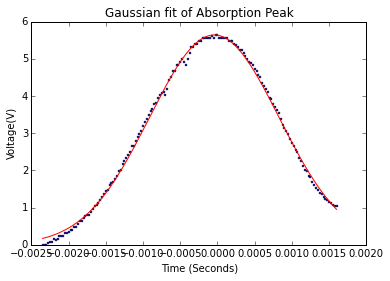

C =  5.6418950914
f0 =  30027.7842795
delf =  238.89095647
Resolution 125.696613732


In [98]:
gauss_fit(120, 279)

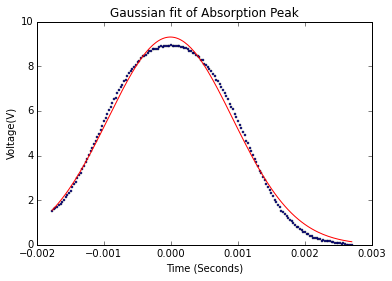

C =  9.3085057128
f0 =  32061.78053
delf =  255.673775765
Resolution 125.401130538


In [99]:
gauss_fit(290, 470)

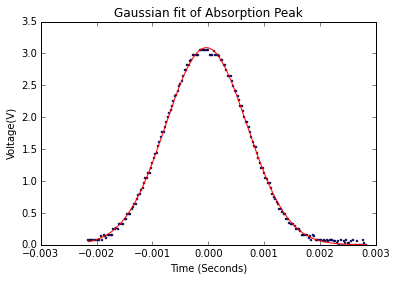

C =  3.0912024804
f0 =  36846.6910779
delf =  200.108481454
Resolution 184.133579997


In [100]:
gauss_fit(625, 825)

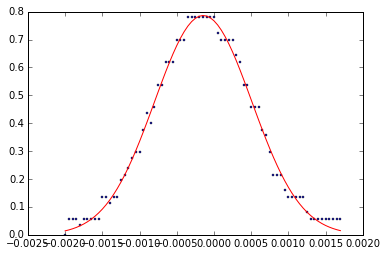

C =  0.786012999881
f0 =  40474.0041368
delf =  179.491853318
Resolution 225.492151252


In [102]:
t = time_1[900: 1050]
v = -volts_1[900: 1050]

Trd = np.arange(0, len(t), 2)

t = [t[i] for i in Trd]
v = [v[i] for i in Trd]

x = asarray(t)
y = asarray(v)

l = 0

for index, i in enumerate(y):
    if i == max(y):
        l = index

x = x - t[l]
y = y - min(v)

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])

plt.plot(x,y,'bo', markersize = 2)
plt.plot(x,gaus(x,*popt),'r',label='fit')
plt.show()
    
res1 =  popt[0] 
res2 = (popt[1] + t[l]) * conversion * 10**3
res3 = popt[2]/2 * conversion * 10**3
    
print 'C = ', res1
print 'f0 = ', res2
print 'delf = ', res3
print 'Resolution', res2/res3

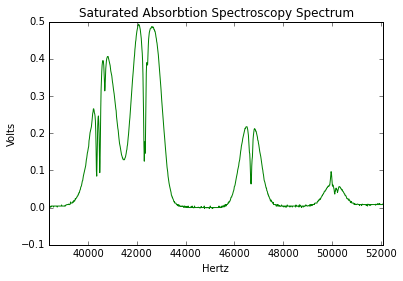

In [116]:
################
g = genfromtxt('4.csv', delimiter=',')

time_2 = g.T[0] * conversion * 10**3
volts_2 = g.T[1]

plt.plot(time_2, -volts_2, 'g')
plt.xlabel('Hertz')
plt.ylabel('Volts')
plt.title('Saturated Absorbtion Spectroscopy Spectrum')
plt.xlim(.07* conversion * 10**3, .095* conversion * 10**3)

plt.show()

50108.8709677
0.158809148985


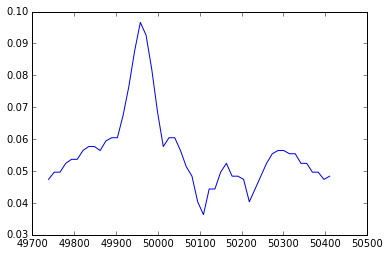

In [138]:
a = 1350
b = 1400

t = time_2[a: b]
v = -volts_2[a: b]

for index, i in enumerate(v):
    if i == min(v):
        print t[index]
        print 7957.747155/t[index]

plt.plot(t, v)
plt.show()